In [4]:
#importing numpy package
import numpy as np

#importing pandas packages
import pandas as pd

#importing seaborn package
import seaborn as sns

#reading deliveries datasheet
delivery=pd.read_csv('deliveries.csv')

#reading ipl matches dataframe
match=pd.read_csv('matches.csv')

In [5]:
#merging the above two datasets
tournament=delivery.merge(match,left_on='match_id',right_on='id')

In [6]:
# Problem 1: Finding Purple Cap holder per season.

#finding Purpe Cap Holder of each season
tournament.groupby(['season','bowler'])['player_dismissed'].count().reset_index().sort_values(['season','player_dismissed'],ascending=False).drop_duplicates(subset='season',keep='first').sort_values('season')[['season','bowler']]

,season,bowler
84,2008,Sohail Tanvir
174,2009,RP Singh
284,2010,PP Ojha
447,2011,SL Malinga
537,2012,M Morkel
629,2013,DJ Bravo
780,2014,MM Sharma
848,2015,DJ Bravo
939,2016,B Kumar
1049,2017,B Kumar


In [7]:
# Problem 2: Finding top 10 batsman vs top 10 bowlers in IPL.

#finding top 10 batsmen in terms of maximum runs
top_batsman=tournament.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

#displaying top 10 batsmen
top_batsman

batsman
SK Raina          4548
V Kohli           4423
RG Sharma         4207
G Gambhir         4132
DA Warner         4014
RV Uthappa        3778
CH Gayle          3651
S Dhawan          3561
MS Dhoni          3560
AB de Villiers    3486
Name: batsman_runs, dtype: int64

In [8]:

#finding bowler wickets
dismissal=['bowled','caught','caught and bowled','stumped','lbw','hit wicket']
wickets=tournament[tournament['dismissal_kind'].isin(dismissal)]

#finding top 10 bowlers
top_bowler=wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

#displaying top 10 bowlers
top_bowler

bowler
SL Malinga         154
A Mishra           134
Harbhajan Singh    127
PP Chawla          126
DJ Bravo           122
B Kumar            111
A Nehra            106
R Vinay Kumar      103
Z Khan             102
R Ashwin           100
Name: player_dismissed, dtype: int64

In [9]:
#finding dataframe for top 10 batsmen
top_batsman_data=(tournament[tournament['batsman'].isin(top_batsman.index.tolist())])

In [10]:
#finding dataframe for top 10 batsmen vs bowler
required_data=top_batsman_data[top_batsman_data['bowler'].isin(top_bowler.index.tolist())]

In [11]:
#forming a pivot table
pivot=required_data.pivot_table(index='bowler',columns='batsman',values='batsman_runs',aggfunc='sum')

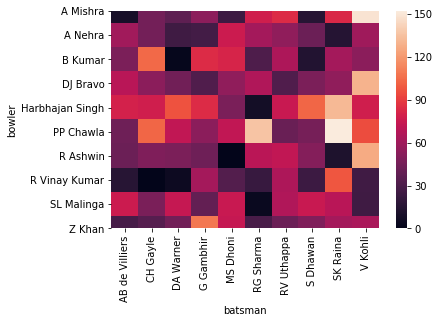

In [12]:
#creating heatmap
sns.heatmap(pivot.fillna(value=0))